<a href="https://colab.research.google.com/github/NIKSONOVER/country/blob/master/labi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Набор данных состоит из нескольких медицинских предикторных (независимых) переменных и одной целевой (зависимой) переменной, **Outcome(Итог)**. Независимые переменные:


*   Месяц беременности (Pregnancies)
*   Уровень глюкозы (Glucose)
*   Артериальное давление (BloodPressure)
*   Толщина кожи (SkinThickness)
*   Инсулин (Insulin)  
*   Индекс массы тела (BMI)
*   Родословная диабета (DiabetesPedigreeFunction)
*   Возраст (Age)


In [ ]:
df=pd.read_csv("winequality-red.csv")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#Посмотрим на данные

In [ ]:
print("Размерность данных ==> ",df.shape)

Размерность данных ==>  (1599, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Данные относятся к отрасли здравоохранения, имеющей 768 записей с 9 переменными. Целевой переменной является **Outcome**. Анализ показывает, что переменные **Glucose	BloodPressure,	SkinThickness, Insulin	and BMI** имеют минимальное значение 0, что не имеет никакого смысла, эти значения либо отсутствуют, либо являются выбросами, но мы не собираемся их изменять, чтобы видеть фактическую статистику данных. Видим, что в столбце **Pregnancies**, минимум равен 0 (Может быть, это признак отсутствия беременности), что значительно, но максимальный месяц беременности составляет 17, что не имеет никакого смысла. Дисперсия между различными переменными-предикторами варьируется в больших масштабах, масштабирование данных будет полезно для прогностического моделирования.

#Очистка данных


Давайте сначала проверим имена столбцов и обработаем, если потребуется какое-либо изменение.

In [ ]:
for i in df.columns:
    print(i)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


Изменим функцию родословной диабета на DPF для удобства

In [ ]:
df.rename({'DiabetesPedigreeFunction':'DPF'},inplace = True,axis =1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Проверим типы данных в столбце

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Все идеально.

#Предварительная обработка

Предварительная обработка данных выходит за рамки очистки данных, которая используется для приведения данных в порядок. Предварительная обработка данных используется для создания данных таким образом, чтобы мы могли подогнать под них модель.

##Отсутствующие значения и Выбросы
Давайте посмотрим на недостающие значения и разберемся с ними. Сначала мы создём функцию для обработки выбросов. Обнаружение на основе стандартного отклонения.

In [ ]:
df.isnull().sum() #проверка нулевых значений

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

Похоже, что пропущенных значений нет. Но в описательной статистике мы видели, что некоторые переменные имеют минимум = 0, а переменная беременности имеет максимум = 17, что не имеет смысла. Итак, давайте исследуем эти переменные и будем относиться к ним соответственно.

In [ ]:
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

Мы видим, что минимум равен 0, что можно считать отсутствием беременности, но максимум равен 17, что не имеет смысла. Давайте посмотрим распределение, а также блокплот для выбросов

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


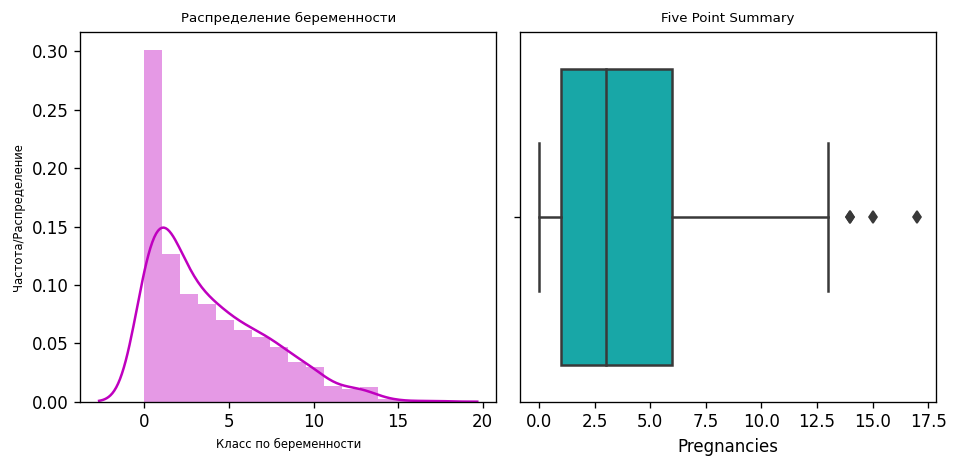

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Pregnancies'],ax=axes[0],color='m')
axes[0].set_title('Распределение беременности',fontdict={'fontsize':8})
axes[0].set_xlabel('Класс по беременности',fontdict={'fontsize':7})
axes[0].set_ylabel('Частота/Распределение',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Pregnancies',data=df,ax=axes[1],orient = 'h',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [ ]:
def std_based(col_name,df):
    mean = df[col_name].mean()
    std = df[col_name].std()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    new_df = df[(df[col_name] < upper) & (df[col_name] > lower)]
    return new_df

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


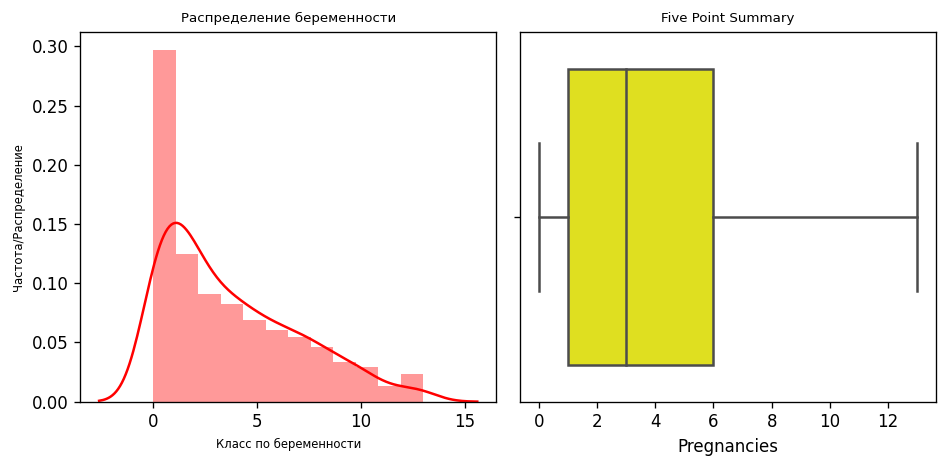

In [ ]:
# Избавление от выброса, а затем  проверка

df = std_based('Pregnancies',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Pregnancies'],ax=axes[0],color='red')
axes[0].set_title('Распределение беременности',fontdict={'fontsize':8})
axes[0].set_xlabel('Класс по беременности',fontdict={'fontsize':7})
axes[0].set_ylabel('Частота/Распределение',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Pregnancies',data=df,ax=axes[1],orient = 'v',color='yellow')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Что ж, мы покончили с беременностью. Давайте посмотрим на следующие.

In [ ]:
df['Glucose'].describe()

count    764.000000
mean     120.776178
std       31.946234
min        0.000000
25%       99.000000
50%      117.000000
75%      140.000000
max      199.000000
Name: Glucose, dtype: float64

Глюкоза = 0, не имеет никакого смысла.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


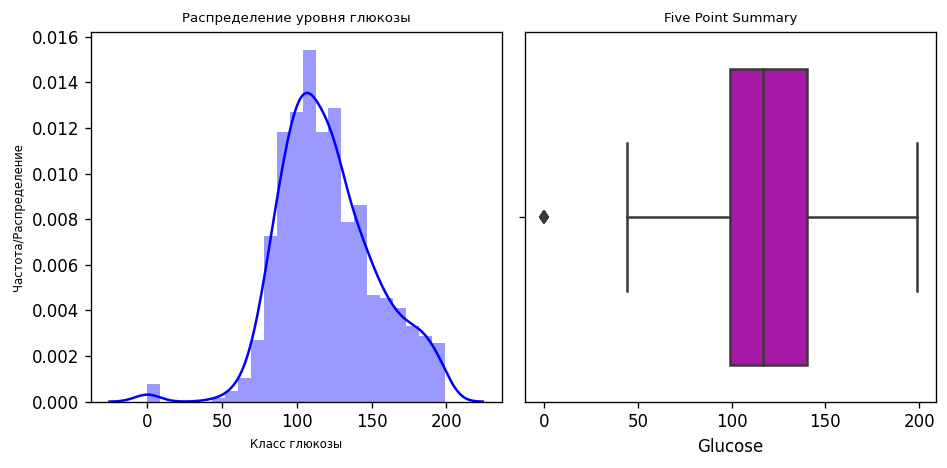

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Glucose'],ax=axes[0],color='b')
axes[0].set_title('Распределение уровня глюкозы',fontdict={'fontsize':8})
axes[0].set_xlabel('Класс глюкозы',fontdict={'fontsize':7})
axes[0].set_ylabel('Частота/Распределение',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Glucose',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Выбросов нет, а также распределение нормальное, поэтому я буду рассматривать 0 как среднее значение.

In [ ]:
df.Glucose = df.Glucose.replace(0,df.Glucose.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


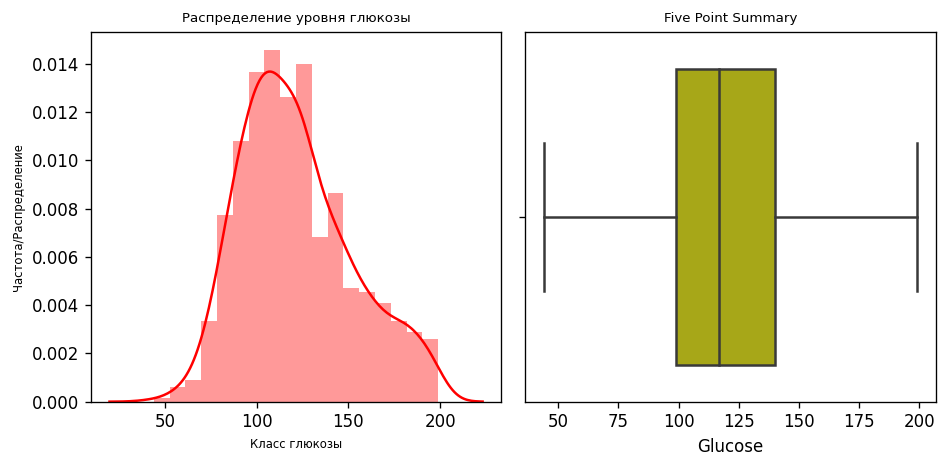

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Glucose'],ax=axes[0],color='r')
axes[0].set_title('Распределение уровня глюкозы',fontdict={'fontsize':8})
axes[0].set_xlabel('Класс глюкозы',fontdict={'fontsize':7})
axes[0].set_ylabel('Частота/Распределение',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Glucose',data=df,ax=axes[1],orient = 'v',color='y')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Что ж, с глюкозой тоже покончено, давайте посмотрим дальше.

In [ ]:
df.BloodPressure.describe()

count    764.000000
mean      69.098168
std       19.401789
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

Нам нужно посмотреть на BloodPressure=0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


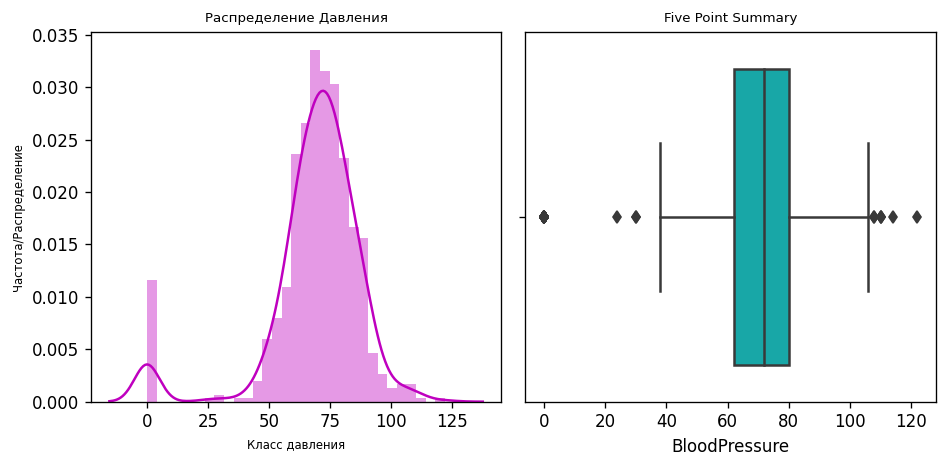

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BloodPressure'],ax=axes[0],color='m')
axes[0].set_title('Распределение Давления',fontdict={'fontsize':8})
axes[0].set_xlabel('Класс давления',fontdict={'fontsize':7})
axes[0].set_ylabel('Частота/Распределение',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.boxplot('BloodPressure',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Похоже, что есть несколько выбросов как на более высоком, так и на более низком уровне. Но на более высоком уровне максимальное Давление составляет 122, так что оно значительно. Сейчас на нижнем уровне Давление около 25 не имеет смысла. Поэтому будем относиться к отсутствующему значению, как к среднему, а затем также будем относиться к выбросам.

In [ ]:
df.BloodPressure = df.BloodPressure.replace(0,df.BloodPressure.median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


In [ ]:
df  = std_based('BloodPressure',df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


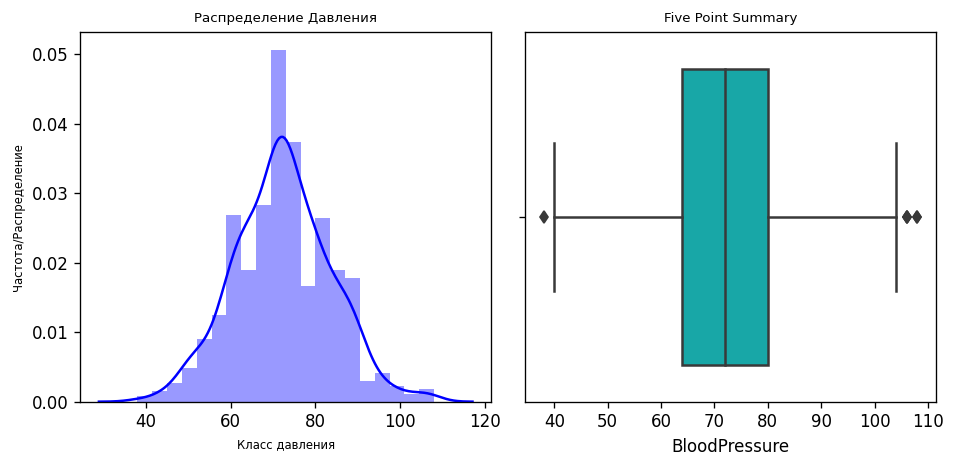

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BloodPressure'],ax=axes[0],color='b')
axes[0].set_title('Распределение Давления',fontdict={'fontsize':8})
axes[0].set_xlabel('Класс давления',fontdict={'fontsize':7})
axes[0].set_ylabel('Частота/Распределение',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BloodPressure',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Продолжаем просматривать

In [ ]:
df.SkinThickness.describe()

count    756.000000
mean      20.428571
std       15.952377
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

Давайте посмотрим на толщину кожи 0.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


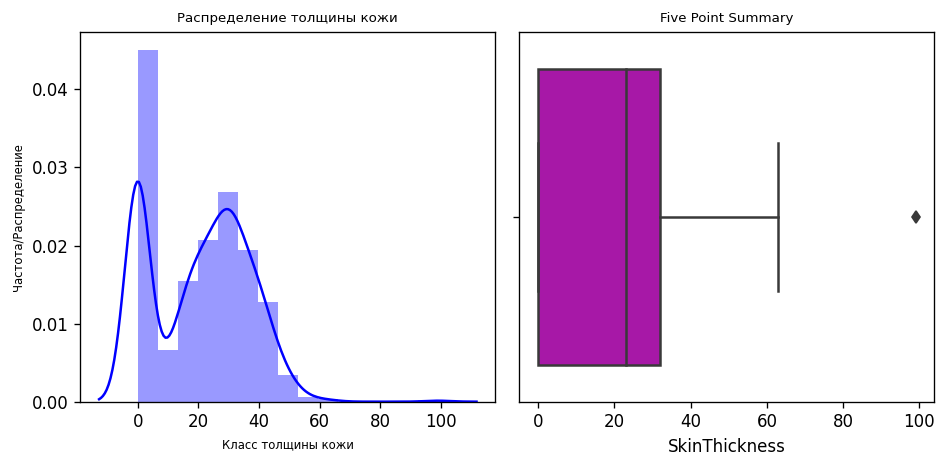

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['SkinThickness'],ax=axes[0],color='b')
axes[0].set_title('Распределение толщины кожи',fontdict={'fontsize':8})
axes[0].set_xlabel('Класс толщины кожи',fontdict={'fontsize':7})
axes[0].set_ylabel('Частота/Распределение',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('SkinThickness',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [ ]:
df.SkinThickness = df.SkinThickness.replace(0,df.SkinThickness.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,0,33.6,0.627,50,1
1,1,85.0,66,29.000000,0,26.6,0.351,31,0
2,8,183.0,64,20.428571,0,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1


In [ ]:
df = std_based("SkinThickness",df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


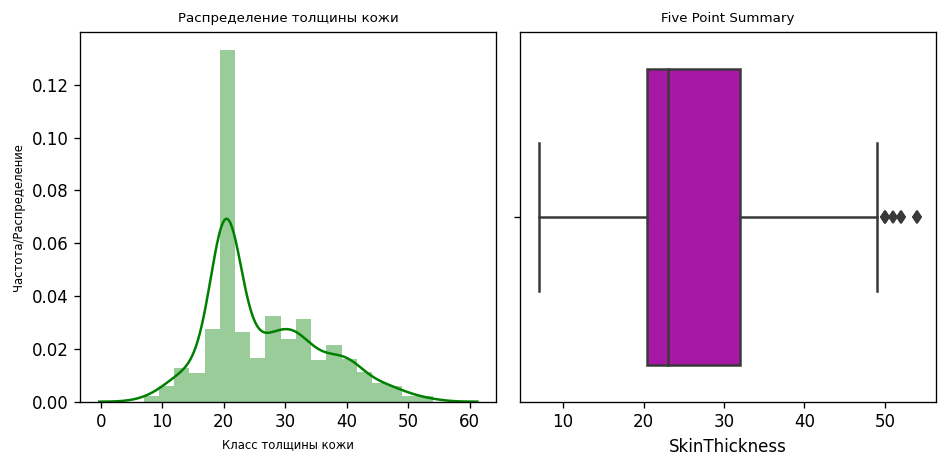

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['SkinThickness'],ax=axes[0],color='green')
axes[0].set_title('Распределение толщины кожи',fontdict={'fontsize':8})
axes[0].set_xlabel('Класс толщины кожи',fontdict={'fontsize':7})
axes[0].set_ylabel('Частота/Распределение',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('SkinThickness',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Продолжаем

In [ ]:
df.Insulin.describe()

count    752.000000
mean      79.889628
std      115.995453
min        0.000000
25%        0.000000
50%       26.000000
75%      128.250000
max      846.000000
Name: Insulin, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


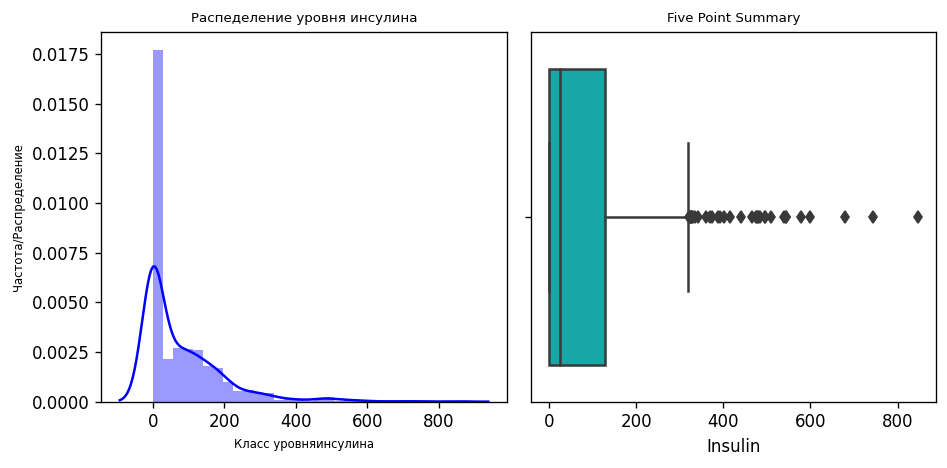

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Insulin'],ax=axes[0],color='b')
axes[0].set_title('Распеделение уровня инсулина',fontdict={'fontsize':8})
axes[0].set_xlabel('Класс уровняинсулина',fontdict={'fontsize':7})
axes[0].set_ylabel('Частота/Распределение',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Insulin',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Мы видим, что есть много отклонений. Поэтому заполним 0 медианой уровня инсулина.

In [ ]:
df.Insulin = df.Insulin.replace(0,df.Insulin.median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,26,33.6,0.627,50,1
1,1,85.0,66,29.000000,26,26.6,0.351,31,0
2,8,183.0,64,20.428571,26,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1


In [ ]:
df = std_based('Insulin',df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


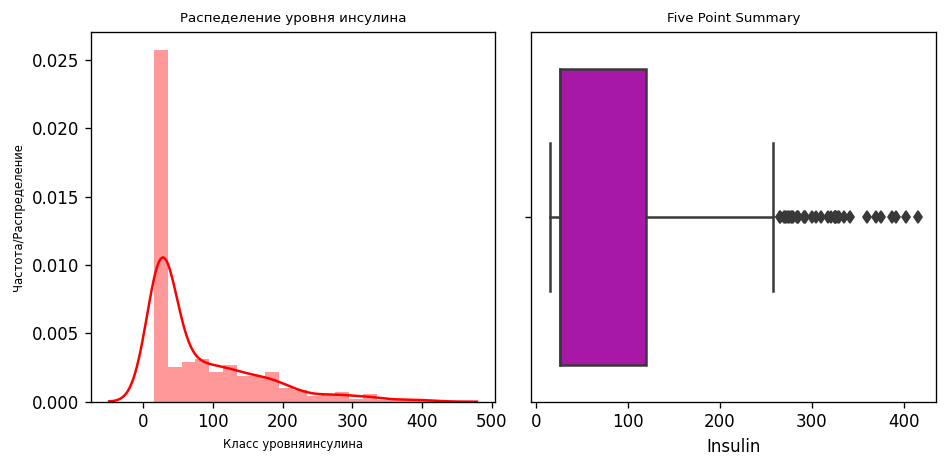

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Insulin'],ax=axes[0],color='r')
axes[0].set_title('Распеделение уровня инсулина',fontdict={'fontsize':8})
axes[0].set_xlabel('Класс уровняинсулина',fontdict={'fontsize':7})
axes[0].set_ylabel('Частота/Распределение',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Insulin',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Продолжаем

In [ ]:
df.BMI.describe()

count    734.000000
mean      31.649728
std        7.630830
min        0.000000
25%       27.025000
50%       32.000000
75%       36.100000
max       57.300000
Name: BMI, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


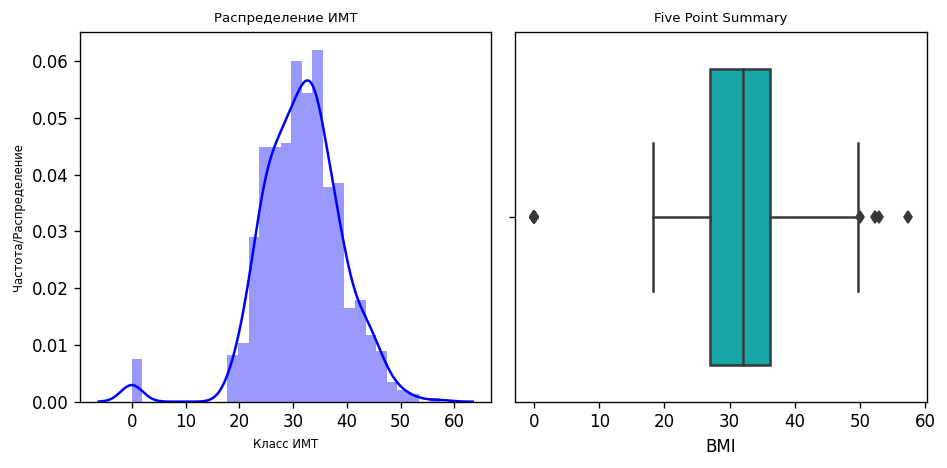

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BMI'],ax=axes[0],color='b')
axes[0].set_title('Распределение ИМТ',fontdict={'fontsize':8})
axes[0].set_xlabel('Класс ИМТ',fontdict={'fontsize':7})
axes[0].set_ylabel('Частота/Распределение',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BMI',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Выбросы значительны, поэтому заменим 0 средним значением.

In [ ]:
df.BMI = df.BMI.replace(0,df.BMI.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,26,33.6,0.627,50,1
1,1,85.0,66,29.000000,26,26.6,0.351,31,0
2,8,183.0,64,20.428571,26,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


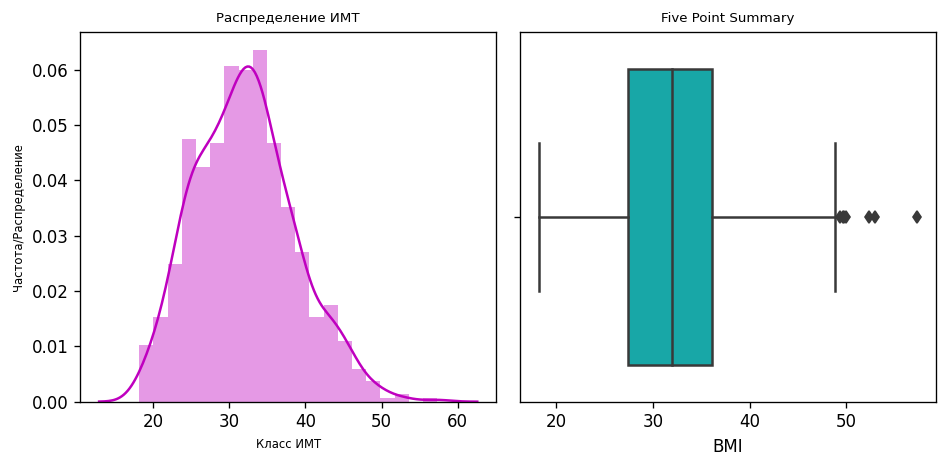

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BMI'],ax=axes[0],color='m')
axes[0].set_title('Распределение ИМТ',fontdict={'fontsize':8})
axes[0].set_xlabel('Класс ИМТ',fontdict={'fontsize':7})
axes[0].set_ylabel('Частота/Распределение',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BMI',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Продолжаем

In [ ]:
df.DPF.describe()

count    734.000000
mean       0.464274
std        0.313676
min        0.078000
25%        0.244000
50%        0.367000
75%        0.612750
max        2.288000
Name: DPF, dtype: float64

Что ж, здесь все в порядке, давайте посмотрим, нет ли отклонений.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


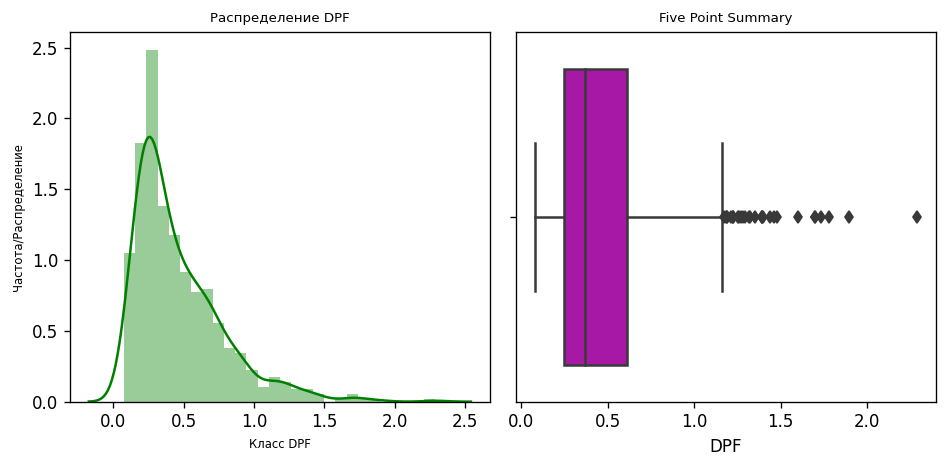

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['DPF'],ax=axes[0],color='green')
axes[0].set_title('Распределение DPF',fontdict={'fontsize':8})
axes[0].set_xlabel('Класс DPF',fontdict={'fontsize':7})
axes[0].set_ylabel('Частота/Распределение',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('DPF',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Выбросы присутствуют на более высоком уровне. Давайте избавляться от них

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


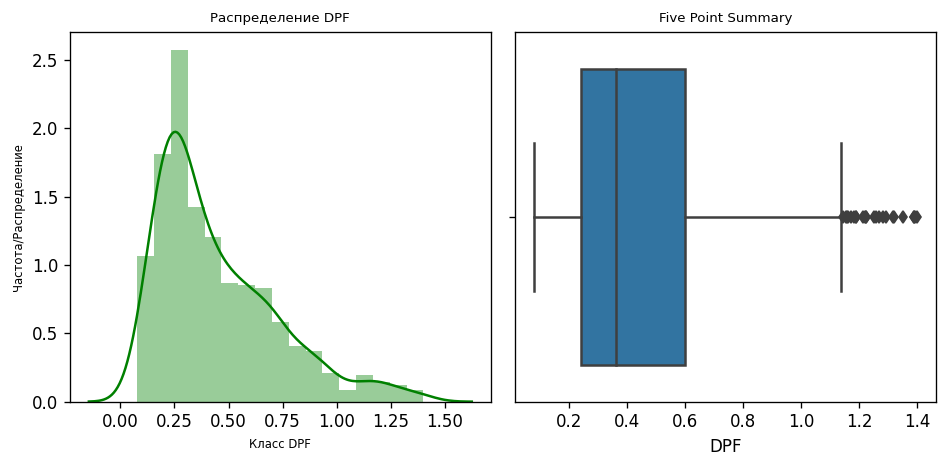

In [ ]:
df = std_based('DPF',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['DPF'],ax=axes[0],color='green')
axes[0].set_title('Распределение DPF',fontdict={'fontsize':8})
axes[0].set_xlabel('Класс DPF',fontdict={'fontsize':7})
axes[0].set_ylabel('Частота/Распределение',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('DPF',data=df,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Продолжаем

In [ ]:
df.Age.describe()

count    724.000000
mean      33.111878
std       11.711371
min       21.000000
25%       24.000000
50%       29.000000
75%       40.000000
max       81.000000
Name: Age, dtype: float64

Давайте взглянем на выбросы.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


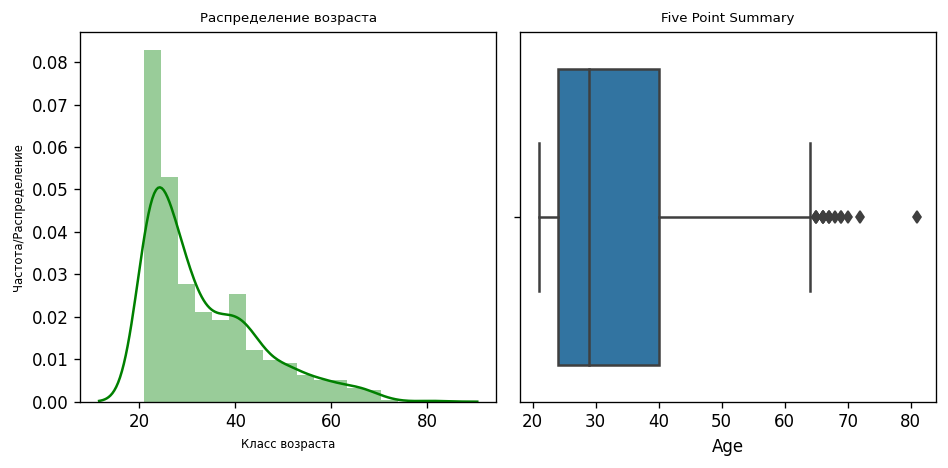

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Age'],ax=axes[0],color='green')
axes[0].set_title('Распределение возраста',fontdict={'fontsize':8})
axes[0].set_xlabel('Класс возраста',fontdict={'fontsize':7})
axes[0].set_ylabel('Частота/Распределение',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Age',data=df,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


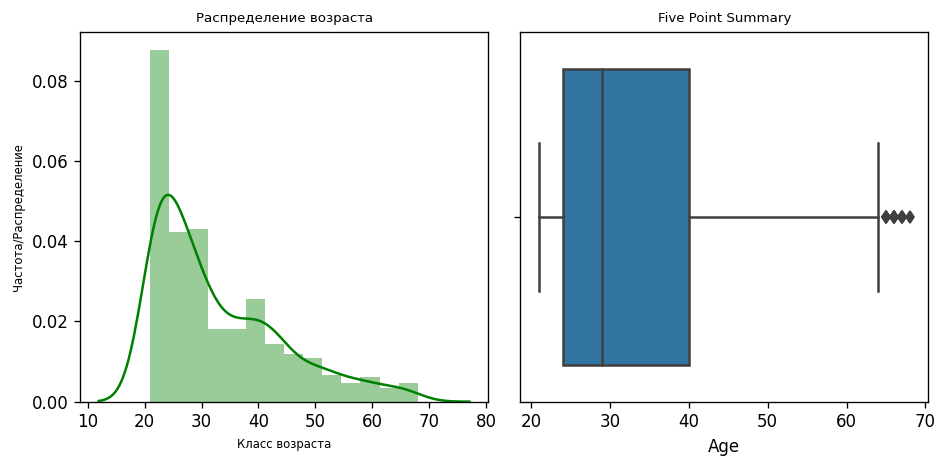

In [ ]:
df = std_based('Age',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Age'],ax=axes[0],color='green')
axes[0].set_title('Распределение возраста',fontdict={'fontsize':8})
axes[0].set_xlabel('Класс возраста',fontdict={'fontsize':7})
axes[0].set_ylabel('Частота/Распределение',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Age',data=df,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Теперь мы закончили с недостающими значениями и выбросами. Давайте взглянем на данные, а затем перейдем к другим шагам.

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,26,33.6,0.627,50,1
1,1,85.0,66,29.000000,26,26.6,0.351,31,0
2,8,183.0,64,20.428571,26,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
5,5,116.0,74,20.428571,26,25.6,0.201,30,0


In [ ]:
df.shape

(719, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    719 non-null    int64  
 1   Glucose        719 non-null    float64
 2   BloodPressure  719 non-null    int64  
 3   SkinThickness  719 non-null    float64
 4   Insulin        719 non-null    int64  
 5   BMI            719 non-null    float64
 6   DPF            719 non-null    float64
 7   Age            719 non-null    int64  
 8   Outcome        719 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 56.2 KB


In [ ]:
df.var()

Pregnancies        10.704623
Glucose           872.795253
BloodPressure     128.731754
SkinThickness      80.891303
Insulin          6387.167685
BMI                42.768611
DPF                 0.077433
Age               127.254326
Outcome             0.223604
dtype: float64

Дисперсия меняется в большей степени, поэтому я буду стандартизировать. Я удаляю dpf, потому что дисперсия очень низкая.

In [ ]:
#df.drop('DPF',axis = 1,inplace=True)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,26,33.6,0.627,50,1
1,1,85.0,66,29.000000,26,26.6,0.351,31,0
2,8,183.0,64,20.428571,26,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
5,5,116.0,74,20.428571,26,25.6,0.201,30,0


In [ ]:
import seaborn as sns

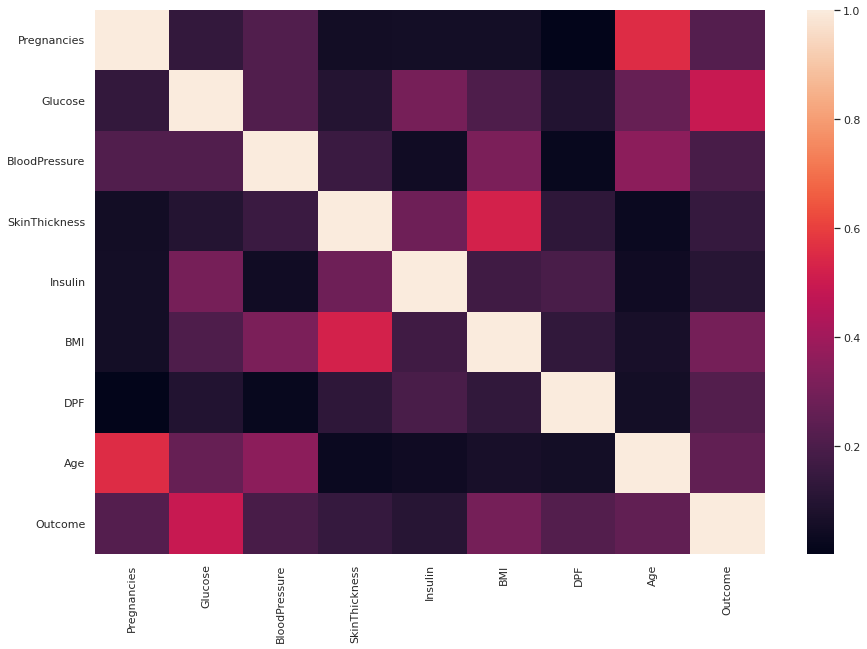

In [ ]:
corr = df.corr().abs()
sns.set(rc={'figure.figsize':(15, 10)})
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Наибольшая корреляция была замеченна между месяцем беременности и возрастом равняется 0.6, что не критично.  

In [ ]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.135613,0.213122,0.051035,0.053255,0.053399,0.001653,0.557880,0.221823
Glucose,0.135613,1.000000,0.213498,0.095663,0.302224,0.206086,0.092752,0.263354,0.491641
BloodPressure,0.213122,0.213498,1.000000,0.153777,0.047034,0.314341,0.022354,0.352649,0.189174
SkinThickness,0.051035,0.095663,0.153777,1.000000,0.286304,0.524291,0.125934,0.029281,0.145217
Insulin,0.053255,0.302224,0.047034,0.286304,1.000000,0.169656,0.192958,0.043506,0.106314
BMI,0.053399,0.206086,0.314341,0.524291,0.169656,1.000000,0.131633,0.067912,0.298165
DPF,0.001653,0.092752,0.022354,0.125934,0.192958,0.131633,1.000000,0.053463,0.218629
Age,0.557880,0.263354,0.352649,0.029281,0.043506,0.067912,0.053463,1.000000,0.251358
Outcome,0.221823,0.491641,0.189174,0.145217,0.106314,0.298165,0.218629,0.251358,1.000000


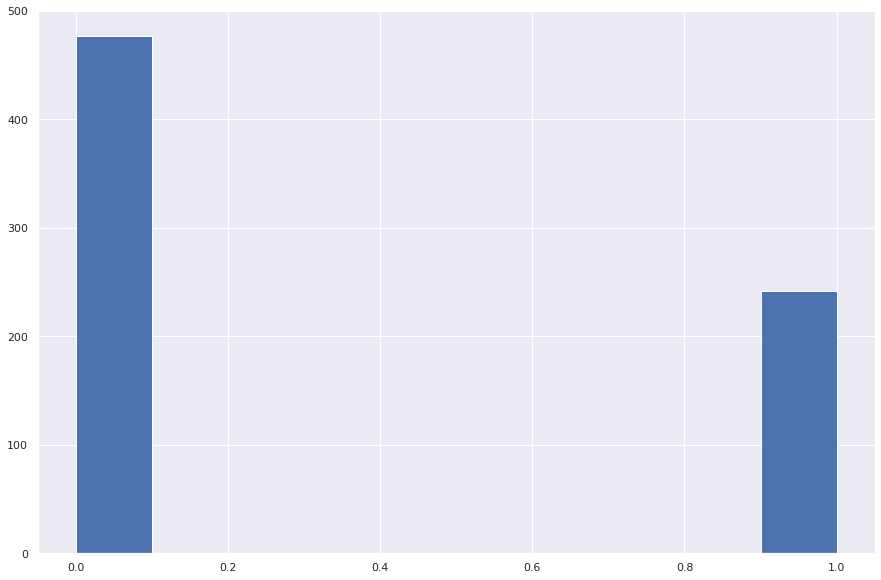

In [ ]:
df.Outcome.hist()

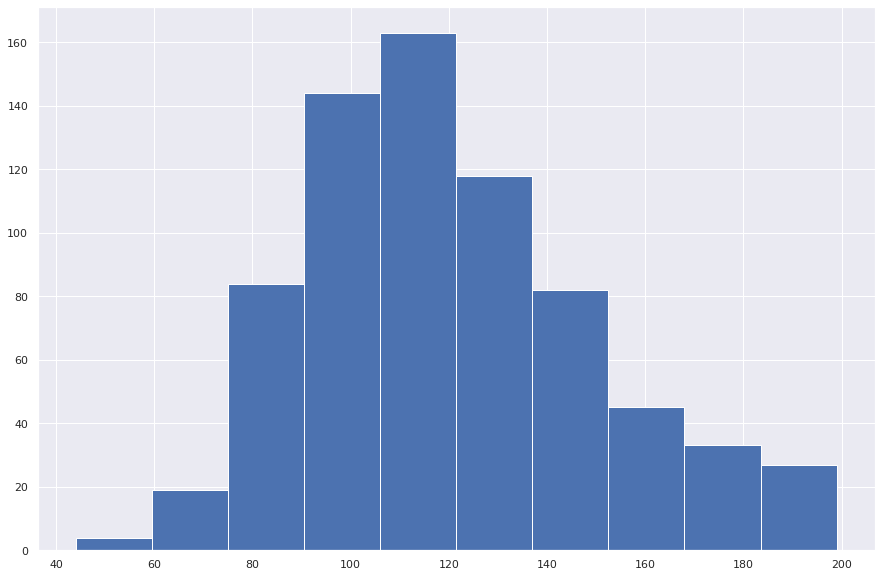

In [ ]:
df.Glucose.hist()

Подготовка данных. 

In [ ]:
X = df.drop(columns = ['Outcome']) #удаления целевого столбца
y = df.Outcome

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#разбиваем на тренировочную и тестовую выборку. размер тестовой выборки 30% от общей
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = MinMaxScaler()
#нормализуем данные. значения от 0 до 1
X_tr_scale = pd.DataFrame(scaler.fit_transform(X_tr), 
                                               columns = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',
                                                          'BMI',"DPF",	'Age'])

X_test = pd.DataFrame(scaler.fit_transform(X_test), 
                                               columns = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',
                                                          'BMI', "DPF",'Age'])


Обучение модели. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_tr, y_tr)
#точность до нормализации
clf.score(X_test, y_test)

0.6388888888888888

In [ ]:
clf = KNeighborsClassifier(15)
clf.fit(X_tr_scale, y_tr)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
clf.score(X_test, y_test)

0.7638888888888888

Оптимальное количество соседей оказалось 15 точность: 0.75 
(без нормализации данных 0.66)
Точность для 10 соседей: 0.73
Точность для 5 соседей: 0.74
Точность для 3 соседей: 0.71

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf.fit(X_tr_scale, y_tr)
clf.score(X_test, y_test)


0.6805555555555556

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_tr_scale, y_tr)
clf.score(X_test, y_test)

0.7638888888888888

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_tr_scale, y_tr)
clf.score(X_test, y_test)

0.7361111111111112

In [ ]:

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_tr_scale, y_tr)
clf.score(X_test, y_test)

0.7430555555555556

В результате лабораторной работы было исследованно влияние предикторных признаков на вероятность появления диабета. По ходу выполнения была проведена очистка данных, удаление выбрасов и нормализация данных. 

Было выдвинуто предположение, что из-за маленькой дисперсии значений столбца DPF он будет излишне влиять на результат, но предположение не подтвердилось и точность предсказания не изменилась.

Испробовав различные алгоритмы из бибилиотеки sklearn, наилучшим оказался линейный классификатор SGDClassifier использующий метод оптимизации SGD (стохастический градиентный спуск) точность: 0.78
Точность для других алгоритмов:
DecisionTreeClassifier (деревье решений) - 0.73
SVC (Метод Опорных Векторов) - 0.76
GaussianNB (наивный байес) - 0.76
KNeighborsClassifier (метод близжайщий соседей) - 0.75


#ЛР3


In [ ]:
def plot_features_coefs(x, y):
  fig = plt.figure(figsize=(15, 15))
  ax = fig.add_subplot(111)
  ax.bar(x, height=y, label='Вклад признаков')
  ax.tick_params(axis='x', which='major', rotation=45)
  plt.legend()
  plt.show()

Логистическая регрессия + L2-регуляризация

C = 1e-05, точность = 0.6388888888888888
C = 0.0001, точность = 0.6388888888888888
C = 0.001, точность = 0.6388888888888888
C = 0.01, точность = 0.6388888888888888
C = 0.1, точность = 0.6805555555555556
C = 1, точность = 0.75
C = 10, точность = 0.7638888888888888
C = 100, точность = 0.7638888888888888
C = 1000, точность = 0.7638888888888888
C = 10000, точность = 0.7638888888888888
C = 100000, точность = 0.7638888888888888


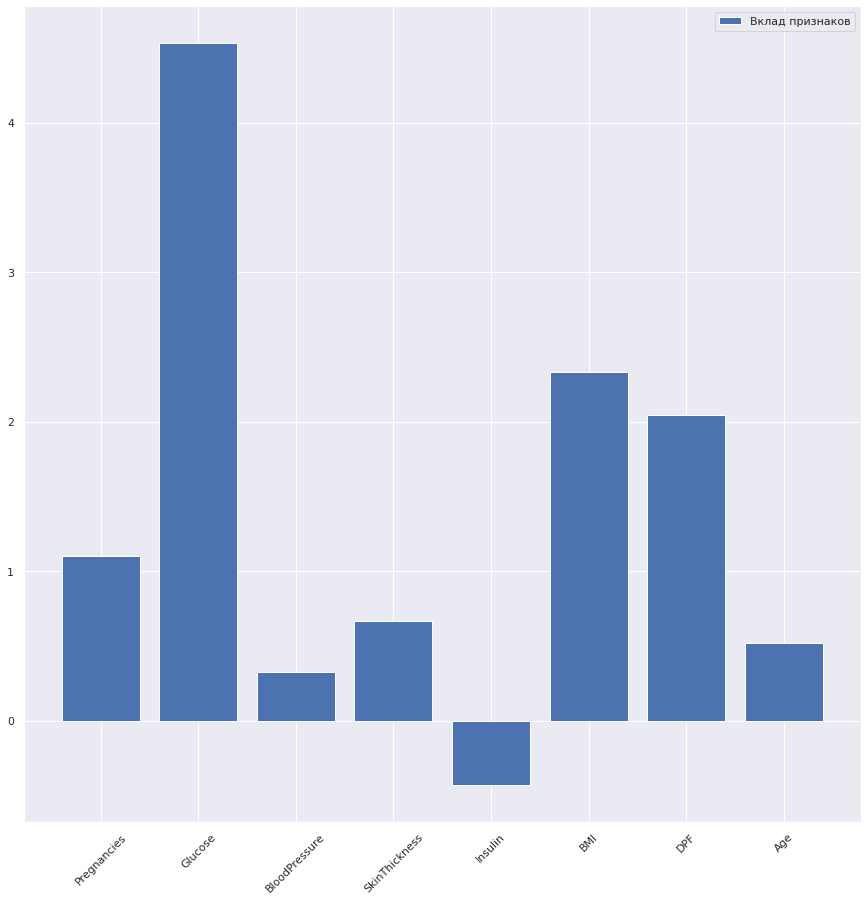

In [ ]:
#используем логистическую регрессию и подбираем С для l2 регуляризации
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
cList = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]
max_c=0
for i in range(0, len(cList)):
  lr = LogisticRegression(C = cList[i],penalty='l2', solver='lbfgs')
  lr.fit(X_tr_scale, y_tr)
  y_pred = lr.predict(X_test)
  
  #проверяем accuracy - точность наших выводов
  lra = accuracy_score(y_test,y_pred)
  if lra>max_c:max_c=cList[i]
  print(f"C = {cList[i]}, точность = {lra}")

lr = LogisticRegression(C = max_c,penalty='l2', solver='lbfgs' )
lr.fit(X_tr_scale, y_tr)
plot_features_coefs(X_test.columns, lr.coef_[0])




Наибольший вклад вносит признаки **Glucose** ,**BMI** , **DPF**, **Pregnancies**.



Оптимальным **C**  можно считать максимальный вес по модулю 

In [ ]:
lr.coef_[0].max()

4.52943102257274



Логистическая регрессия + L1-регуляризация



C = 1e-05, точность = 0.6388888888888888
C = 0.0001, точность = 0.6388888888888888
C = 0.001, точность = 0.6388888888888888
C = 0.01, точность = 0.6388888888888888
C = 0.1, точность = 0.6805555555555556
C = 1, точность = 0.7569444444444444
C = 10, точность = 0.7638888888888888
C = 100, точность = 0.7638888888888888
C = 1000, точность = 0.7638888888888888
C = 10000, точность = 0.7638888888888888
C = 100000, точность = 0.7638888888888888


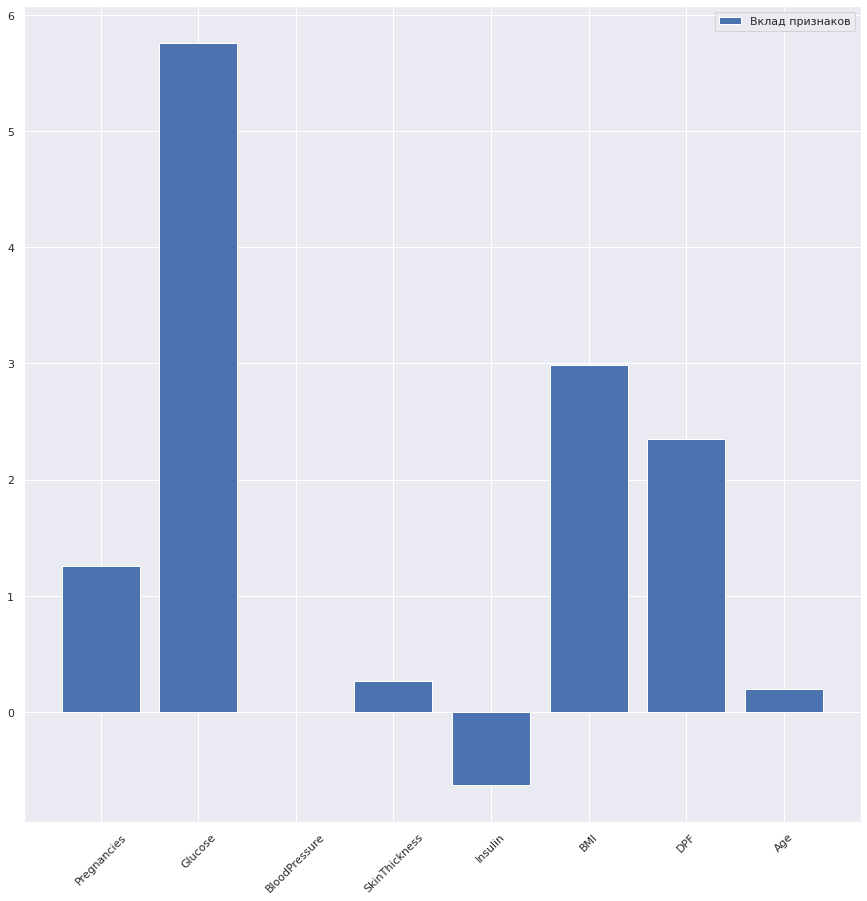

In [ ]:
#используем логистическую регрессию и подбираем С для l1 регуляризации
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
cList = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]
max_c=0
for i in range(0, len(cList)):
  lr = LogisticRegression(C = cList[i],penalty='l1', solver='liblinear')
  lr.fit(X_tr_scale, y_tr)
  y_pred = lr.predict(X_test)
  
  #проверяем accuracy - точность наших выводов
  lra = accuracy_score(y_test,y_pred)
  if lra>max_c:max_c=cList[i]
  print(f"C = {cList[i]}, точность = {lra}")

lr = LogisticRegression(C = max_c,penalty='l1', solver='liblinear')
lr.fit(X_tr_scale, y_tr)
plot_features_coefs(X_test.columns, lr.coef_[0])


Наибольший вклад вносит признаки **Glucose** ,**BMI** , **DPF**,**Pregnancies**.


Оптимальным **C**  можно считать максимальный вес по модулю 

In [ ]:
lr.coef_[0].max()

5.753858977450829

По полученным результатам можно сделать вывод что при L1-регуляризации доля правильных ответов наибольшая и равна **0.8194**

Отберём признаки для для метода прижайших соседей, это будут признаки: **BloodPressure**, **SkinThickness** , **Insulin**, **Age**.

In [ ]:
df_for_knn_l3=df.copy()

In [ ]:
df_for_knn_l3=df_for_knn_l3.drop(columns = ['Glucose',"BMI","DPF","Pregnancies"])

In [ ]:

#разбиваем на тренировочную и тестовую выборку. размер тестовой выборки 30% от общей
x_train_l3, x_test_l3, y_train_l3, y_test_l3 = train_test_split(x_l3, y_l3, test_size=0.2)

In [ ]:
df_for_knn_l3.head()

,BloodPressure,SkinThickness,Insulin,Age,Outcome
0,72,35.000000,26,50,1
1,66,29.000000,26,31,0
2,64,20.428571,26,32,1
3,66,23.000000,94,21,0
5,74,20.428571,26,30,0


In [ ]:
scaler_l3 = MinMaxScaler()
#нормализуем данные. значения от 0 до 1
x_train_l3_scale = pd.DataFrame(scaler_l3.fit_transform(x_train_l3), 
                                               columns = ['BloodPressure',	'SkinThickness',	'Insulin','Age'])

x_test_l3 = pd.DataFrame(scaler_l3.fit_transform(x_test_l3), 
                                               columns = ['BloodPressure',	'SkinThickness',	'Insulin','Age'])

In [ ]:
knn_lr3=0
i_lr3=0
for i in range (1,20):
  clf = KNeighborsClassifier(i)
  clf.fit(x_train_l3_scale, y_train_l3)
  if knn_lr3<clf.score(x_test_l3, y_test_l3):
    i_lr3=i
    knn_lr3=clf.score(x_test_l3, y_test_l3)
clf = KNeighborsClassifier(i_lr3)
clf.fit(x_train_l3_scale, y_train_l3)
clf.score(x_test_l3, y_test_l3)

0.7222222222222222

Отбор l1-регуляризации

In [ ]:
df_for_knn_l3=df.copy()
df_for_knn_l3=df_for_knn_l3.drop(columns =['BloodPressure', 'SkinThickness' , 'Insulin', 'Age'])
x_l3 = df_for_knn_l3.drop(columns = ['Outcome']) #удаления целевого столбца
y_l3 = df_for_knn_l3.Outcome
#разбиваем на тренировочную и тестовую выборку. размер тестовой выборки 30% от общей
x_train_l3, x_test_l3, y_train_l3, y_test_l3 = train_test_split(x_l3, y_l3, test_size=0.2)

In [ ]:
df_for_knn_l3

,Pregnancies,Glucose,BMI,DPF,Outcome
0,6,148.0,33.6,0.627,1
1,1,85.0,26.6,0.351,0
2,8,183.0,23.3,0.672,1
3,1,89.0,28.1,0.167,0
5,5,116.0,25.6,0.201,0
...,...,...,...,...,...
763,10,101.0,32.9,0.171,0
764,2,122.0,36.8,0.340,0
765,5,121.0,26.2,0.245,0
766,1,126.0,30.1,0.349,1


In [ ]:
scaler_l3 = MinMaxScaler()
#нормализуем данные. значения от 0 до 1
x_train_l3_scale = pd.DataFrame(scaler_l3.fit_transform(x_train_l3), 
                                               columns = ['Glucose' ,'BMI' , 'DPF','Pregnancies'])

x_test_l3 = pd.DataFrame(scaler_l3.fit_transform(x_test_l3), 
                                               columns = ['Glucose' ,'BMI' , 'DPF','Pregnancies'])

In [ ]:
x_test_l3

,Glucose,BMI,DPF,Pregnancies
0,0.384615,0.422078,0.534426,0.344968
1,0.000000,0.571429,0.422951,0.246753
2,0.076923,0.175325,0.075410,0.265422
3,0.307692,0.636364,0.803279,0.451299
4,0.769231,0.577922,0.245902,0.126623
...,...,...,...,...
139,1.000000,0.207792,0.436066,0.073864
140,0.076923,0.396104,0.157377,0.079545
141,0.076923,0.357143,0.626230,0.262175
142,0.153846,0.363636,0.688525,0.477273


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
cList = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]
max_c=0
for i in range(0, len(cList)):
  lr = LogisticRegression(C = cList[i],penalty='l1', solver='liblinear')
  lr.fit(x_train_l3_scale, y_train_l3)
  y_pred_lr3 = lr.predict(x_test_l3)
  
  #проверяем accuracy - точность наших выводов
  lra = accuracy_score(y_test_l3,y_pred_lr3)
  if lra>max_c:max_c=cList[i]
  print(f"C = {cList[i]}, точность = {lra}")

lr = LogisticRegression(C = max_c,penalty='l1', solver='liblinear')
lr.fit(x_train_l3_scale, y_train_l3)
plot_features_coefs(x_test_l3.columns, lr.coef_[0])

NameError: ignored

# ЛР4

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=17)
tree_clf.fit(X_tr_scale, y_tr)

DecisionTreeClassifier(random_state=17)

In [ ]:
tree_clf.score(X_test, y_test)

0.6736111111111112

Рандомный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
rf = RandomForestClassifier(n_estimators=400, random_state=42)
rf.fit(X_tr_scale, y_tr)

RandomForestClassifier(n_estimators=400, random_state=42)

In [ ]:
rf.score(X_test, y_test)

0.75

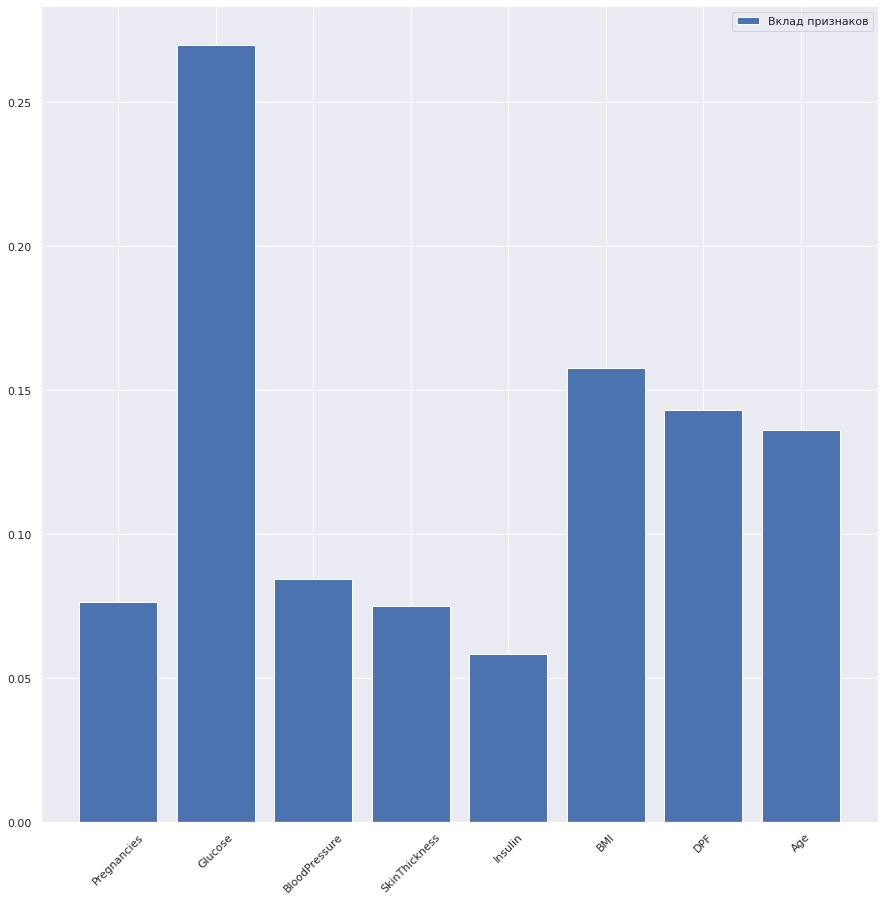

In [ ]:
plot_features_coefs(X_test.columns, rf.feature_importances_)

Наиболее важными признаками являются **Glucose**, **BMI**, **DiabetesPedigreeFunction**, **Age**

Сравнение с кросс валидацией и без нее

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
rf = RandomForestClassifier(n_estimators=300, random_state=42)
res = cross_val_score(rf, X_tr_scale, y_tr, cv=5)
print(res.max())

0.808695652173913


In [ ]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_tr_scale, y_tr)
sc = rf.score(X_test, y_test)
print(sc)

0.7361111111111112


Используя кросс валидацию результат лучше

# Градиентный бустинг

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.5 MB/s 


In [ ]:
%%time
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
import numpy as np

scores = np.ndarray([10, 10])
for i, n_trees in enumerate(np.linspace(1, 100, 10)):
    for j, depth in enumerate(np.arange(2, 12)): 
        p = CatBoostRegressor(n_estimators=n_trees, max_depth=depth).fit(X_tr_scale, y_tr).predict(X_test)
        scores[i, j] = mean_squared_error(y_test, p)

Выходные данные были обрезаны до нескольких последних строк (5000).
1:	learn: 0.4003688	total: 1.03ms	remaining: 10.9ms
2:	learn: 0.3927335	total: 1.66ms	remaining: 11.1ms
3:	learn: 0.3861434	total: 2.46ms	remaining: 11.7ms
4:	learn: 0.3779556	total: 3.18ms	remaining: 11.4ms
5:	learn: 0.3732096	total: 3.82ms	remaining: 10.8ms
6:	learn: 0.3714454	total: 4.65ms	remaining: 10.6ms
7:	learn: 0.3694714	total: 5.26ms	remaining: 9.86ms
8:	learn: 0.3684382	total: 5.9ms	remaining: 9.18ms
9:	learn: 0.3647695	total: 6.51ms	remaining: 8.47ms
10:	learn: 0.3624787	total: 7.22ms	remaining: 7.88ms
11:	learn: 0.3612367	total: 7.6ms	remaining: 6.97ms
12:	learn: 0.3594799	total: 8.24ms	remaining: 6.34ms
13:	learn: 0.3578155	total: 8.87ms	remaining: 5.71ms
14:	learn: 0.3560544	total: 9.47ms	remaining: 5.05ms
15:	learn: 0.3539949	total: 10.1ms	remaining: 4.43ms
16:	learn: 0.3511955	total: 11.9ms	remaining: 4.2ms
17:	learn: 0.3500082	total: 12.3ms	remaining: 3.42ms
18:	learn: 0.3496556	total: 12.8ms	remainin

In [ ]:
%%time

from sklearn.ensemble import RandomForestRegressor

linear_preds = RandomForestRegressor().fit(X_tr_scale, y_tr).predict(X_test)
res5 = mean_squared_error(y_test, linear_preds) ** 0.5
print(res5)

0.455857708062505
CPU times: user 259 ms, sys: 0 ns, total: 259 ms
Wall time: 260 ms


In [ ]:
%%time
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
import numpy as np

scores = np.ndarray([10, 10])
for i, n_trees in enumerate(np.linspace(1, 100, 10)):
    for j, depth in enumerate(np.arange(2, 12)):
        p = CatBoostRegressor(n_estimators=n_trees, max_depth=depth, task_type="GPU").fit(X_tr_scale, y_tr).predict(X_test)
        scores[i, j] = mean_squared_error(y_test, p)

ModuleNotFoundError: ignored